In [2]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
generator_path = '../data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']
detector_spectrums = spectrums

gebless_spectrums = generator_path+'gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

soil_fluxes = generator_path+'soil_fluxes.npz'
soil_fluxes = np.load(soil_fluxes)
soil_fluxes = soil_fluxes['y']

In [4]:
filenames_path = '../filenames.csv'
filenames = pd.read_csv(filenames_path)['name']

In [5]:
# make dataframe
df = pd.DataFrame()
df['filename'] = filenames
df['detector'] = detector_spectrums[:, 0].tolist()
df['gebless'] = gebless_spectrums[:, 0].tolist()
df['soil'] = soil_fluxes[:, 0].tolist()

In [103]:
def plott(spectrums, suptitle):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(suptitle)
    c_center = 4.44
    c_width = 0.15
    c_window = [c_center - c_width, c_center + c_width]
    c_maxs = []
    c_mins = []
    for i in range(len(spectrums)):
        axs[0, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        c_maxs.append(np.max(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        c_mins.append(np.min(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        # draw stem plots for spectrum
    axs[0, 1].legend()
    axs[0, 1].set_title('Carbon Window (Zoomed)')
    axs[0, 1].set_xlabel('MeV')
    axs[0, 1].set_ylabel('Intensity')
    axs[0, 1].set_xlim(c_center - c_width, c_center + c_width)
    axs[0, 1].set_ylim(np.min(c_mins), np.max(c_maxs))

    # Third subplot
    si_center = 1.78
    si_width = 0.15
    si_window = [si_center - si_width, si_center + si_width]
    si_maxs = []
    si_mins = []
    for i in range(len(spectrums)):
        axs[1, 0].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        si_maxs.append(np.max(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_mins.append(np.min(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
    axs[1, 0].legend()
    axs[1, 0].set_title('Silicone Window (Zoomed)')
    axs[1, 0].set_xlabel('MeV')
    axs[1, 0].set_ylabel('Intensity')
    axs[1, 0].set_xlim(si_center - si_width, si_center + si_width)
    axs[1, 0].set_ylim(np.min(si_mins), np.max(si_maxs))

    # Fourth subplot
    low_window = [0.1, 1]
    low_maxs = []
    low_mins = []
    for i in range(len(spectrums)):
        axs[1, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        low_maxs.append(np.max(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
        low_mins.append(np.min(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
    axs[1, 1].legend()
    axs[1, 1].set_title('Low Energy (Zoomed)')
    axs[1, 1].set_xlabel('MeV')
    axs[1, 1].set_ylabel('Intensity')
    axs[1, 1].set_xlim(low_window[0], low_window[1])
    axs[1, 1].set_ylim(np.min(low_mins), np.max(low_maxs))

    # First subplot
    for i in range(len(spectrums)):
        axs[0, 0].plot(bins, spectrums[i][0], label=filenames[i])
    axs[0, 0].legend()
    axs[0, 0].set_title('Spectrums')
    axs[0, 0].set_xlabel('MeV')
    axs[0, 0].set_ylabel('Intensity')
    # draw squares around the zoomed regions
    for ax in axs:
        for a in ax:
            a.add_patch(plt.Rectangle((0.1, np.min(low_mins)), 0.9, np.max(low_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((si_center - si_width, np.min(si_mins)), si_width*2, np.max(si_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((c_center - c_width, np.min(c_mins)), c_width*2, np.max(c_maxs), fill=None, edgecolor='red'))
    # label the zoomed regions
    axs[0, 0].text((low_window[0]+low_window[1])/2, np.max(low_maxs), 'Low Energy', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(c_center, np.max(c_maxs), 'Carbon', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(si_center, np.max(si_maxs), 'Silicone', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')

    # log_toggle = [True, True, True, True]
    log_toggle = [False, False, False, False]

    for i in range(log_toggle.__len__()):
        if log_toggle[i]:
            axs[i//2, i%2].set_yscale('log')

    # log scale
    plt.tight_layout()
    plt.show()


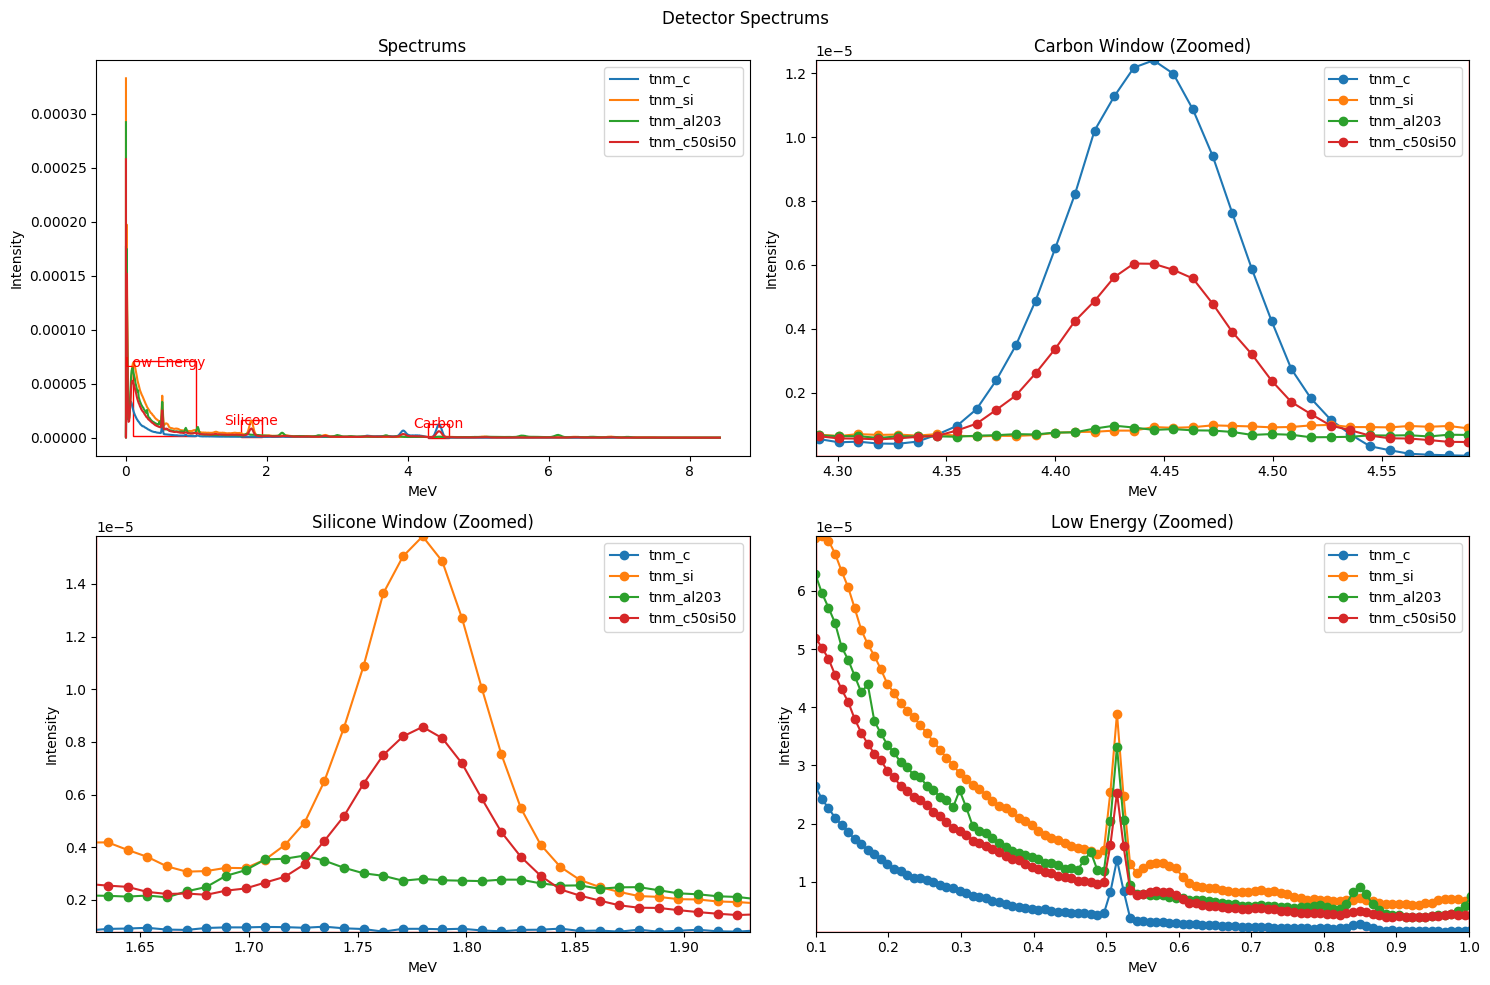

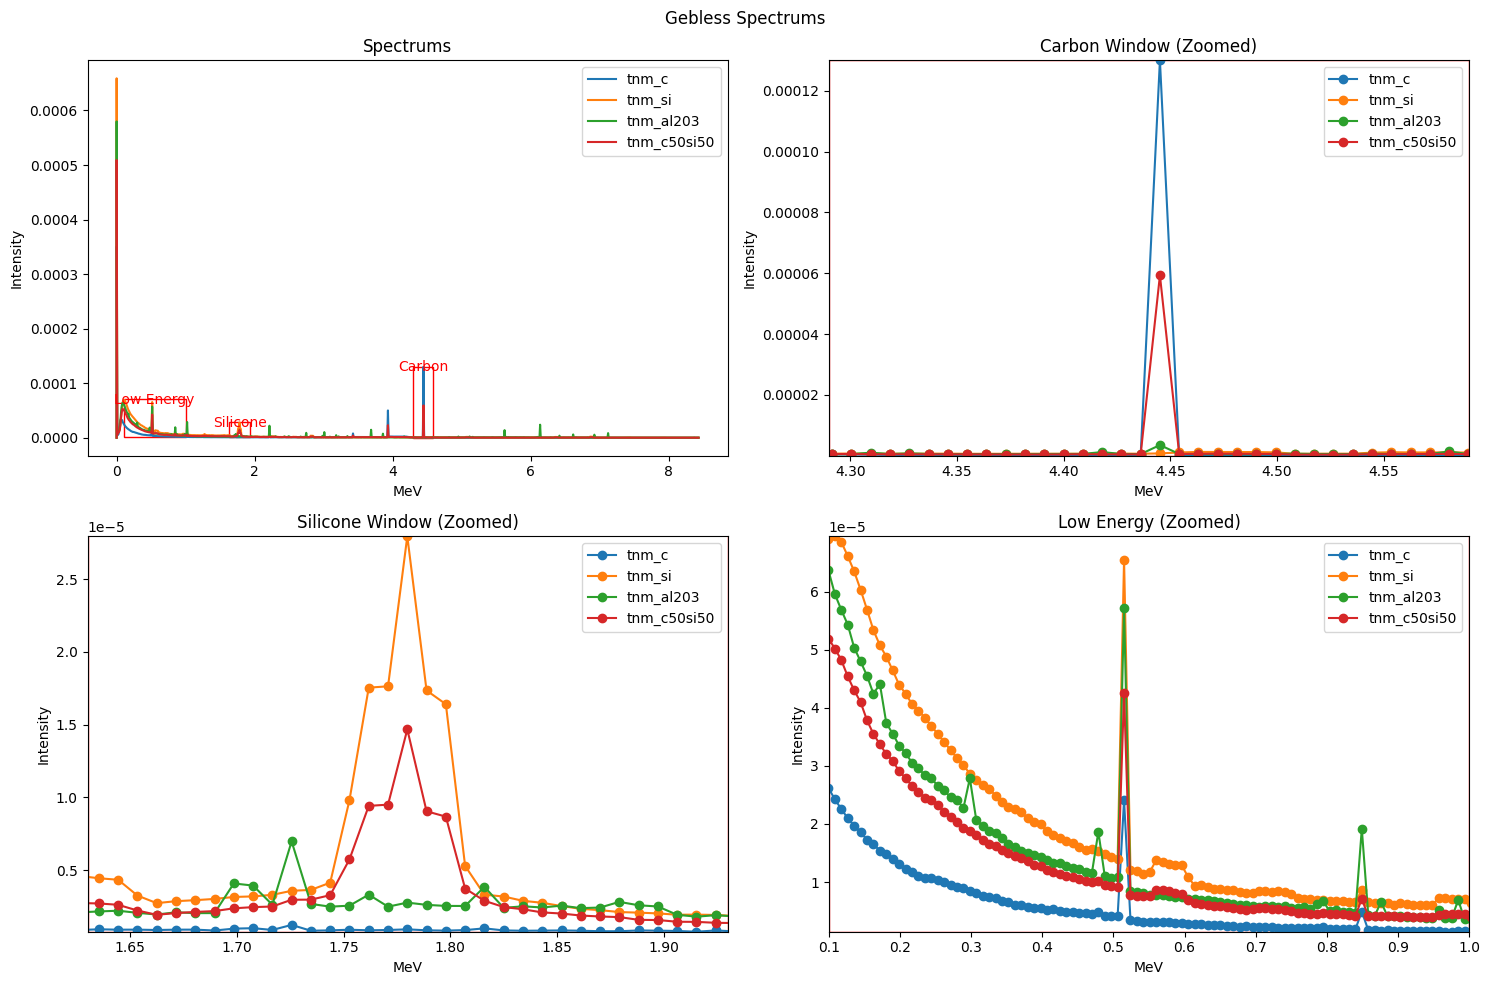

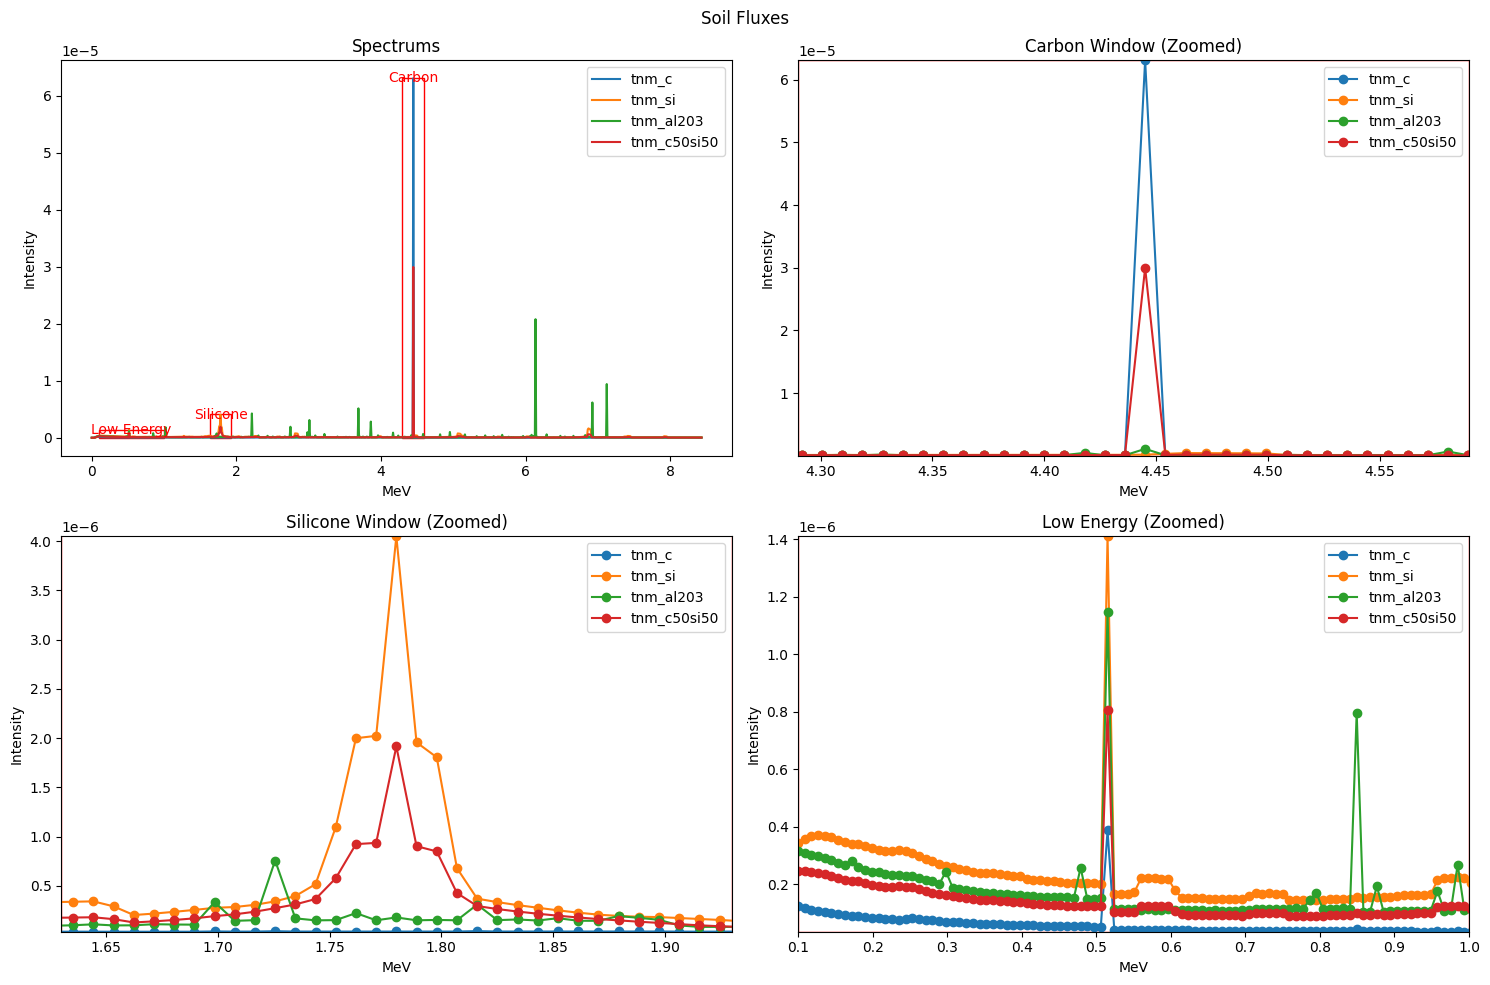

In [104]:
plott(detector_spectrums, 'Detector Spectrums')
plott(gebless_spectrums, 'Gebless Spectrums')
plott(soil_fluxes, 'Soil Fluxes')

In [8]:
soil_fluxes[0, 0, :].shape

(935,)

In [9]:
gebless_spectrums[0, 0, :].shape

(935,)

In [10]:
# soil_flux*A = gebless, A is a matrix
# use tensorflow to solve for A

In [11]:
import tensorflow as tf

In [73]:
A_0 = tf.Variable(tf.random.normal([bins.shape[0], bins.shape[0]]))
gebless = tf.constant(gebless_spectrums[0, 0, :])
soil_flux = tf.constant(soil_fluxes[0, 0, :], dtype=tf.float32)



In [71]:
def loss_fn(A, gebless, soil_flux):
    return tf.reduce_mean(tf.square(tf.cast(tf.reshape(tf.matmul(A, tf.reshape(soil_flux, [935, 1])), [935]), dtype=tf.float64)-gebless))


In [107]:
def optimize(A_0, gebless, soil_flux):
    optimizer = tf.optimizers.Adam(learning_rate=0.5)

    steps = 100000
    steps_per_epoch = 1000
    total_epochs = steps // steps_per_epoch
    epoch = 0
    for i in range(steps):
        with tf.GradientTape() as tape:
            loss = loss_fn(A_0, gebless, soil_flux)
        grads = tape.gradient(loss, A_0)
        optimizer.apply_gradients([(grads, A_0)])
        if i % steps_per_epoch == 0:
            print(f'loss: {loss}', f'epoch: {epoch}/{total_epochs}')
            epoch += 1

    return A_0.numpy()

In [106]:
As = []
for i in range(gebless_spectrums.shape[0]):
    gebless = tf.constant(gebless_spectrums[i, 0, :])
    soil_flux = tf.constant(soil_fluxes[i, 0, :], dtype=tf.float32)
    A_0 = tf.Variable(tf.random.normal([bins.shape[0], bins.shape[0]]))
    A = optimize(A_0, gebless, soil_flux)
    As.append(A)

loss: 4.295075405714806e-09 epoch: 0/100
loss: 4.0878586496335255e-09 epoch: 1000/100
loss: 3.7940843770273576e-09 epoch: 2000/100
loss: 3.497232187261874e-09 epoch: 3000/100
loss: 3.2159444588587137e-09 epoch: 4000/100
loss: 2.954749960397754e-09 epoch: 5000/100
loss: 2.7139205331297997e-09 epoch: 6000/100
loss: 2.492434550742959e-09 epoch: 7000/100
loss: 2.2889276318829975e-09 epoch: 8000/100
loss: 2.102004337544227e-09 epoch: 9000/100
loss: 1.930335050755074e-09 epoch: 10000/100
loss: 1.7726821265706352e-09 epoch: 11000/100
loss: 1.6279036971570184e-09 epoch: 12000/100
loss: 1.4949492176370452e-09 epoch: 13000/100
loss: 1.3728533538175633e-09 epoch: 14000/100
loss: 1.2607293738866425e-09 epoch: 15000/100
loss: 1.1577628790297647e-09 epoch: 16000/100
loss: 1.0632059765392111e-09 epoch: 17000/100
loss: 9.763718843355145e-10 epoch: 18000/100
loss: 8.966297979768398e-10 epoch: 19000/100
loss: 8.234005241751882e-10 epoch: 20000/100
loss: 7.561522438439233e-10 epoch: 21000/100
loss: 6.943

In [75]:
tf.reshape(tf.matmul(A, tf.reshape(soil_flux, [935, 1])), [935]).numpy().shape

(935,)

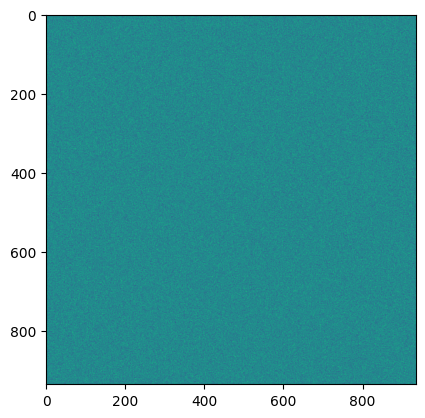

In [101]:
plt.imshow(A)

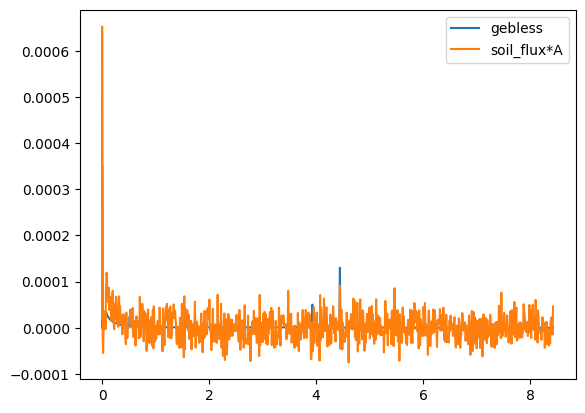

In [115]:
# plot gebless and soil_flux*A
n = 0
a = 3
plt.plot(bins, tf.constant(gebless_spectrums[n, 0, :]), label='gebless')
plt.plot(bins, tf.reshape(tf.matmul(As[a], tf.reshape(tf.constant(soil_fluxes[n, 0, :], dtype=tf.float32), [935, 1])), [935]).numpy(), label='soil_flux*A')
plt.legend()
plt.show()

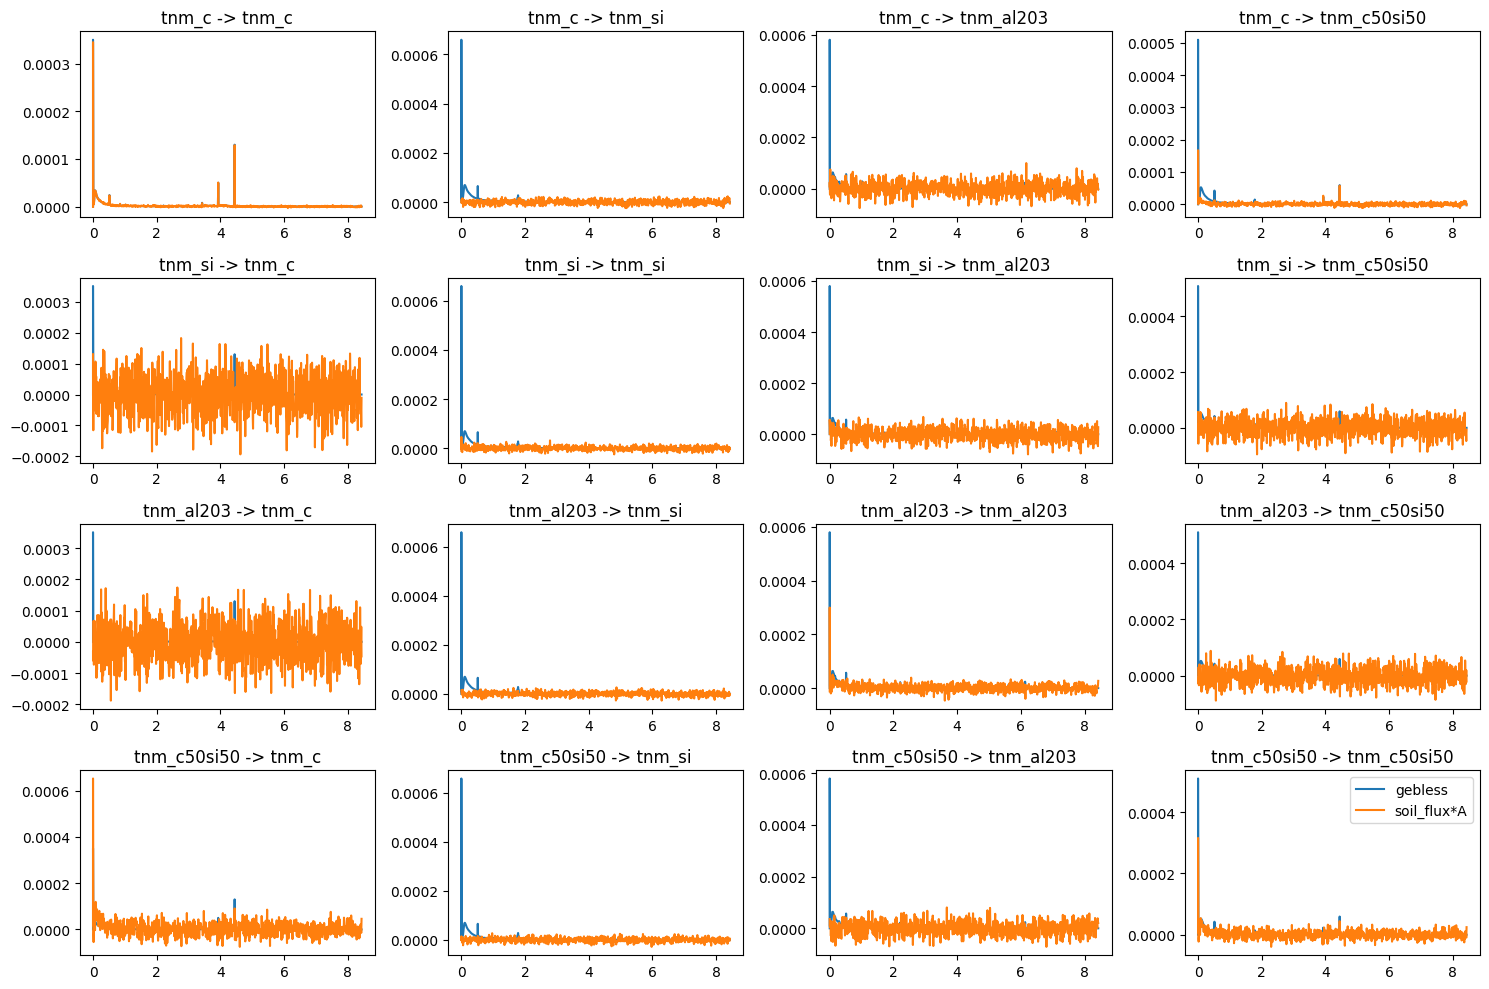

In [123]:
fig, axs = plt.subplots(len(df['filename']), len(df['filename']), figsize=(15, 10))

for a, training_filename in enumerate(df['filename']):
    for n, testing_filename in enumerate(df['filename']):
        axs[a, n].plot(bins, tf.constant(gebless_spectrums[n, 0, :]), label='gebless')
        axs[a, n].plot(bins, tf.reshape(tf.matmul(As[a], tf.reshape(tf.constant(soil_fluxes[n, 0, :], dtype=tf.float32), [935, 1])), [935]).numpy(), label='soil_flux*A')
        axs[a, n].set_title(f'{training_filename} -> {testing_filename}')
        # axs[a, n].legend()
plt.legend()
plt.tight_layout()
plt.show()
